 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
pip install seaborn


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_path = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_path, index_col = "Date", parse_dates = True, infer_datetime_format = True)
whale_df.head()

/var/folders/nc/k83ql1n54sq4ty03_j4sv8pm0000gp/T/ipykernel_4920/272026112.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale_df = pd.read_csv(whale_path, index_col = "Date", parse_dates = True, infer_datetime_format = True)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_df = whale_df.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_path = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_path, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
algo_df.head()

/var/folders/nc/k83ql1n54sq4ty03_j4sv8pm0000gp/T/ipykernel_4920/1846536880.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algo_df = pd.read_csv(algo_path, index_col = 'Date', parse_dates = True, infer_datetime_format = True)


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_df = algo_df.dropna()

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
sp500_path = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_path, index_col = "Date", parse_dates = True, infer_datetime_format = True)
sp500_df.head()

/var/folders/nc/k83ql1n54sq4ty03_j4sv8pm0000gp/T/ipykernel_4920/850142908.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sp500_df = pd.read_csv(sp500_path, index_col = "Date", parse_dates = True, infer_datetime_format = True)
/var/folders/nc/k83ql1n54sq4ty03_j4sv8pm0000gp/T/ipykernel_4920/850142908.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_df = pd.read_csv(sp500_path, index_col = "Date", parse_dates = True, infer_datetime_format = True)


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [10]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [11]:
# Clean identified numeric fields with $ symbol
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")
sp500_df["Close"]

Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
               ...   
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: Close, Length: 1649, dtype: object

In [12]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].astype("float")
sp500_df.dtypes

Close    float64
dtype: object

In [13]:
# Calculate Daily Returns
sp500_return = sp500_df.pct_change()
sp500_return

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [14]:
# Drop nulls
sp500_return = sp500_return.dropna()
sp500_return.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp500_return = sp500_return.rename(columns={
    "Close": "S&P500"})
sp500_return.head()

,S&P500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
joined_portfolio = pd.concat([whale_df, algo_df, sp500_return], axis = "columns", join = "inner")
joined_portfolio

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: title={'center': 'Daily Returns'}, xlabel='Date'>

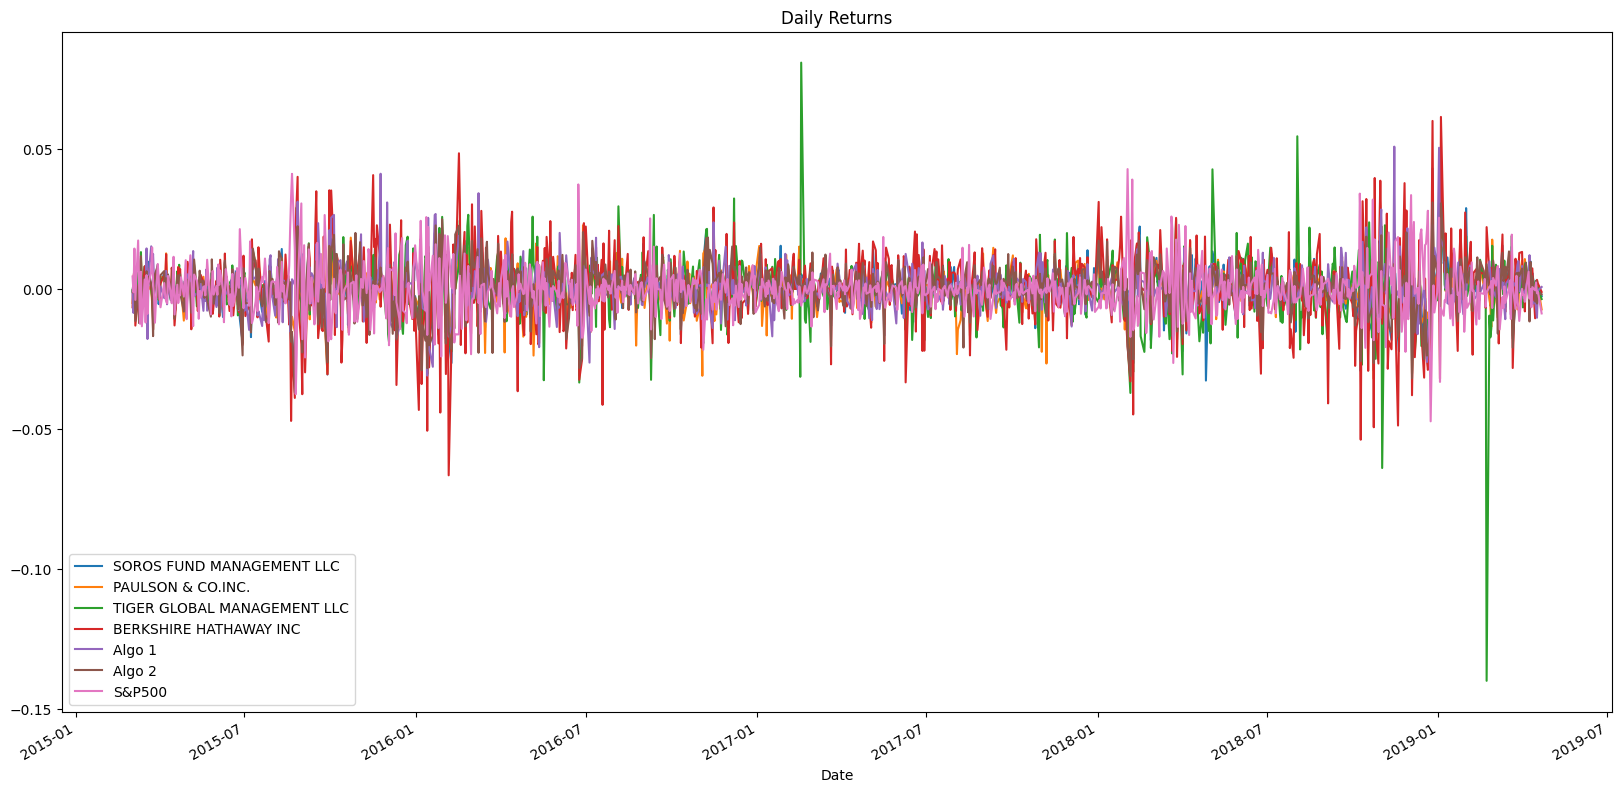

In [17]:
# Plot daily returns of all portfolios
joined_portfolio.plot(title = "Daily Returns", figsize = (20, 10))

#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

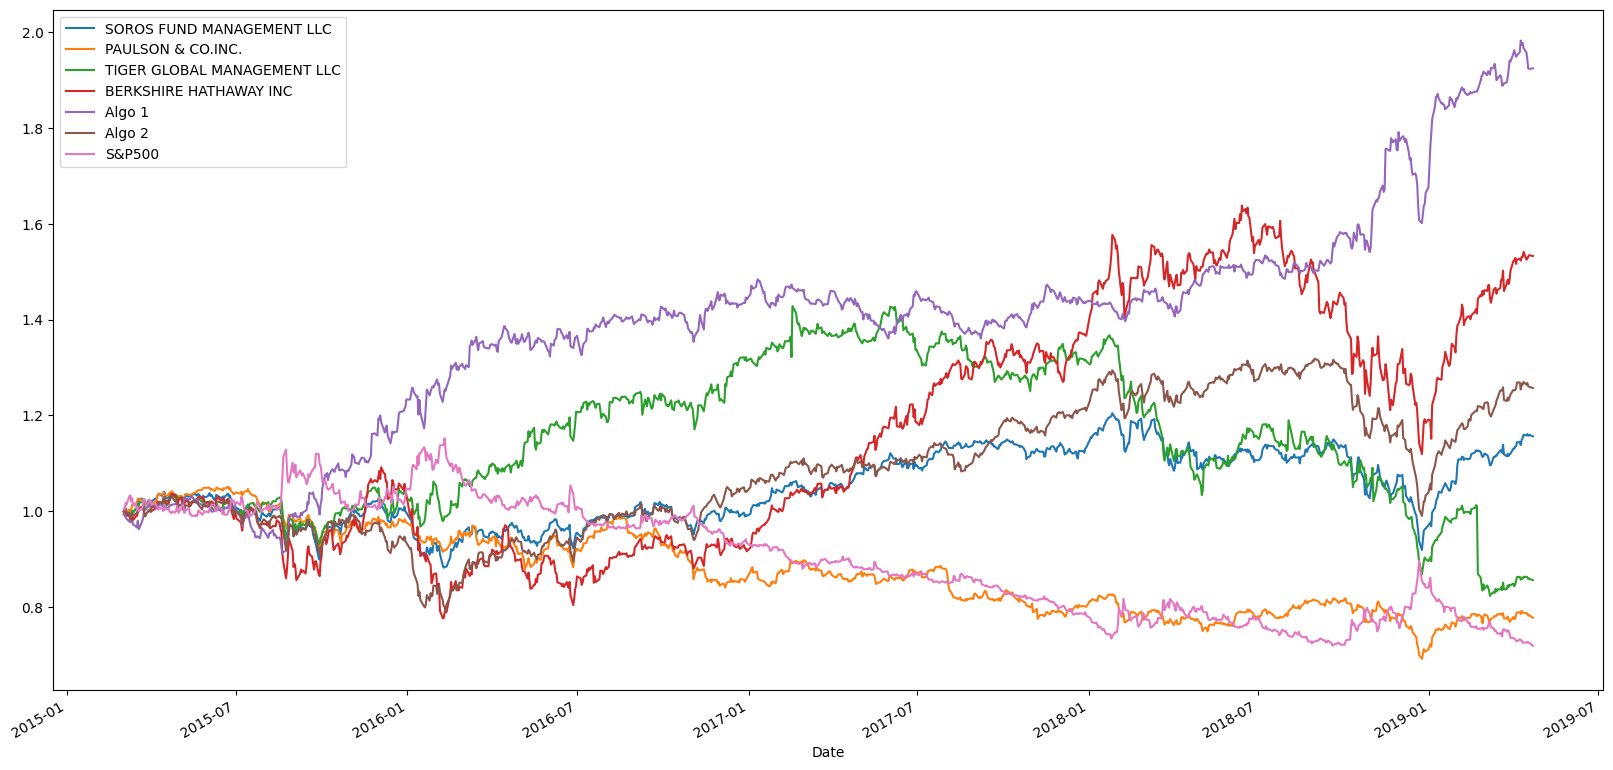

In [18]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + joined_portfolio).cumprod()
cumulative_returns.head()
# Plot cumulative returns
cumulative_returns.plot(figsize = (20, 10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

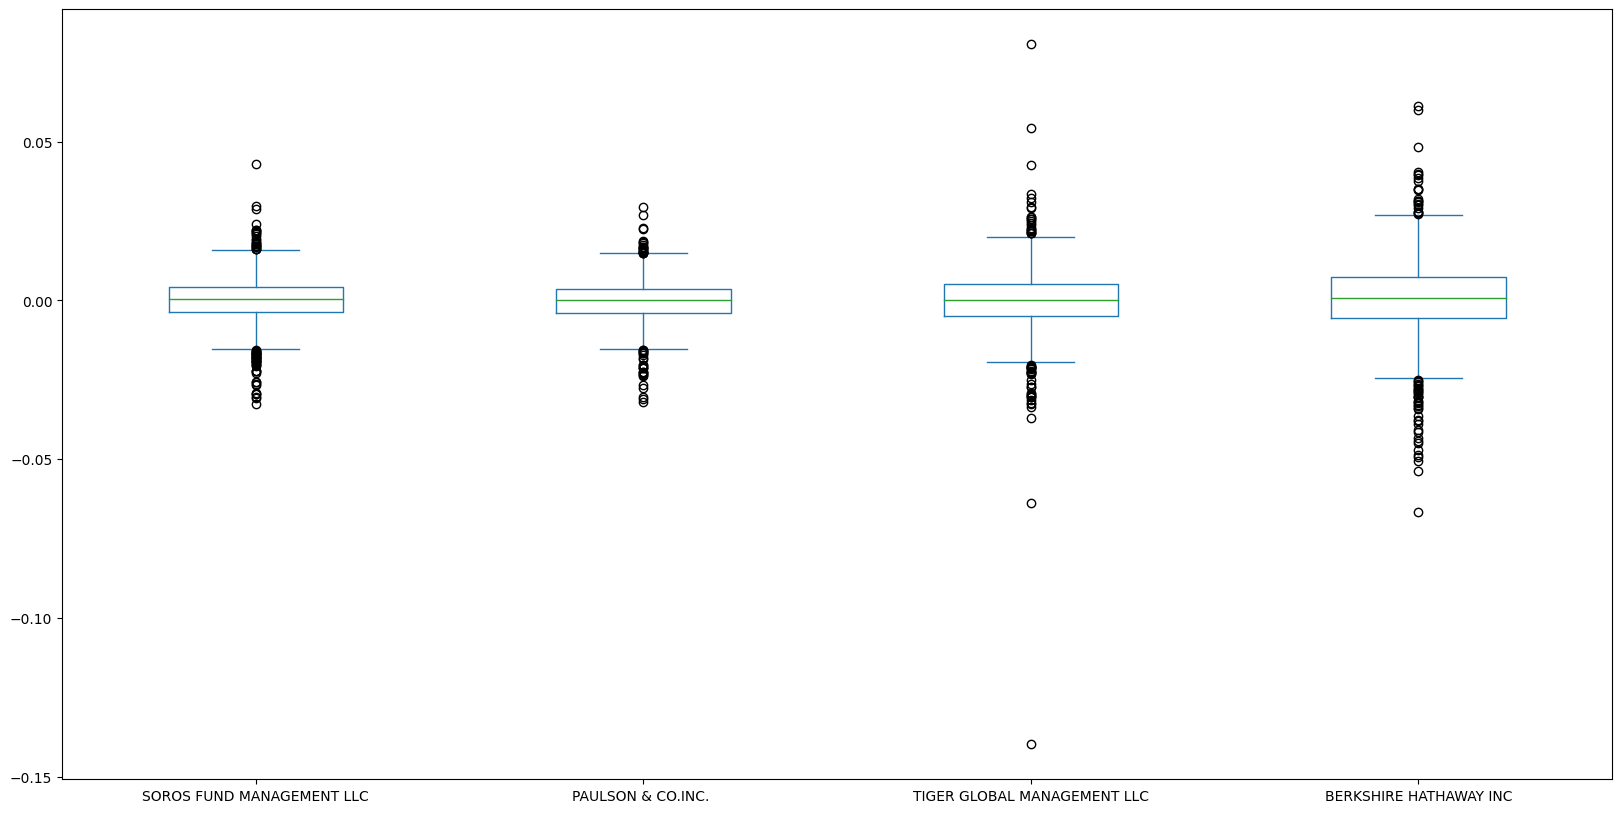

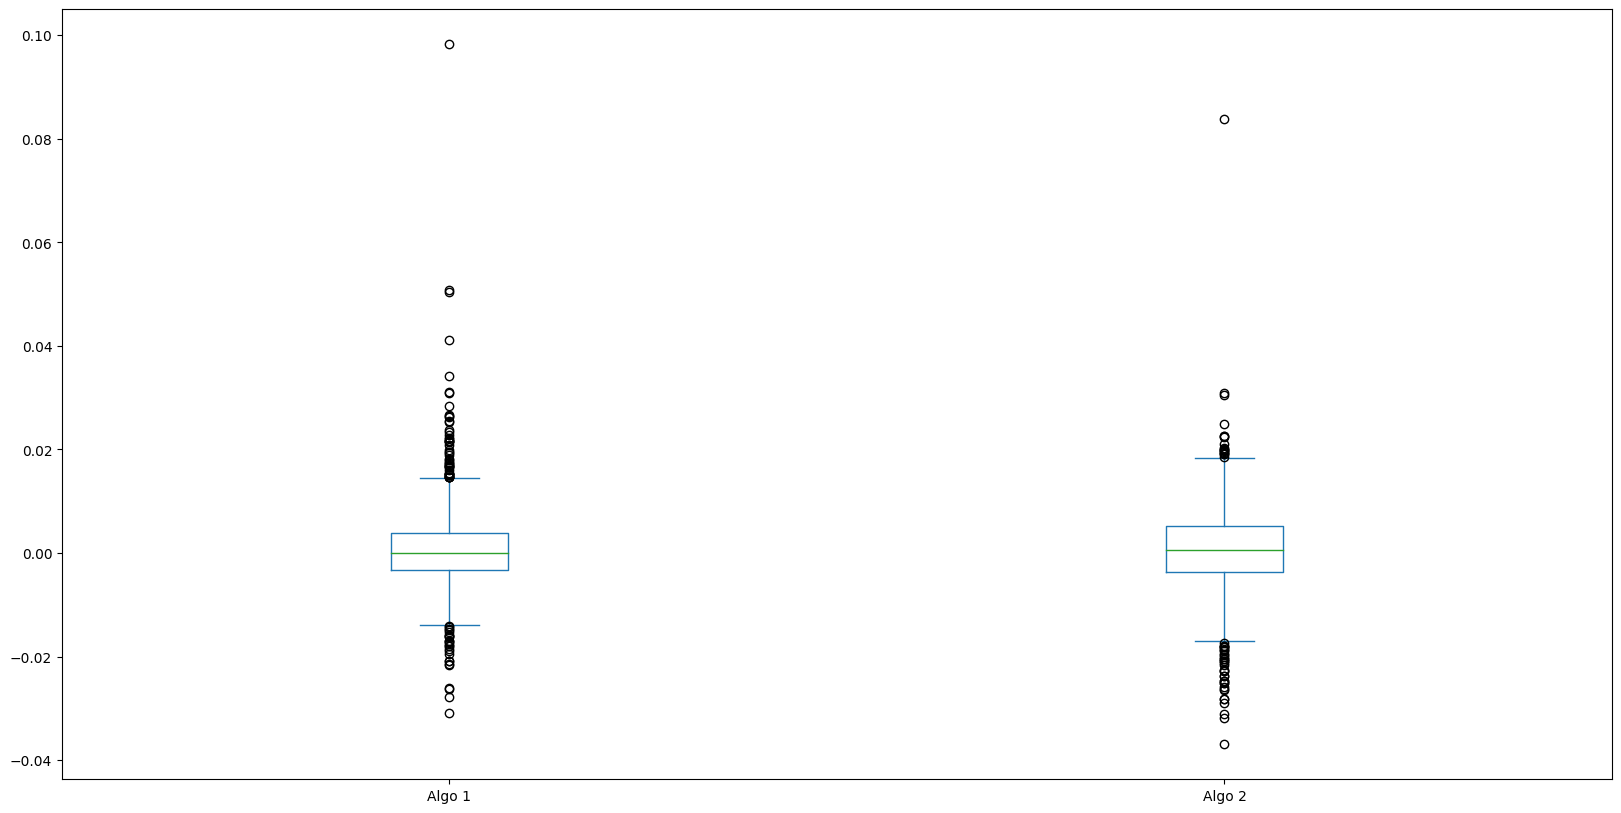

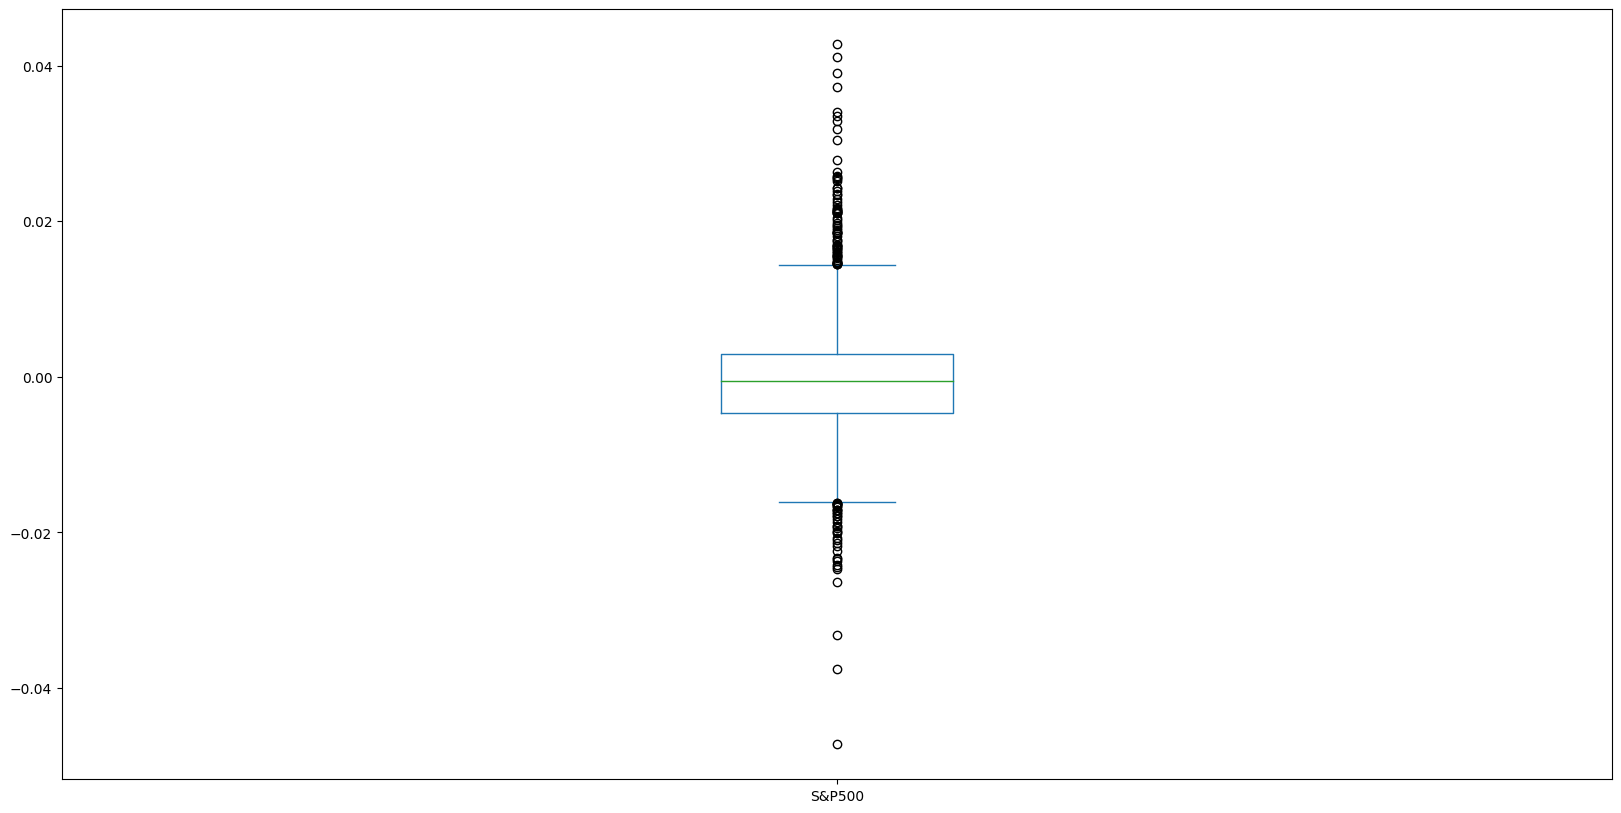

In [19]:
# Box plot to visually show risk
whale_df.plot.box(figsize=(20,10))
algo_df.plot.box(figsize=(20,10))
sp500_return.plot.box(figsize=(20,10))

### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
daily_std = joined_portfolio.std().sort_values(ascending = True)
daily_std

PAULSON & CO.INC.              0.007026
Algo 1                         0.007623
SOROS FUND MANAGEMENT LLC      0.007896
Algo 2                         0.008341
S&P500                         0.008587
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [21]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = daily_std["S&P500"].std()

# Determine which portfolios are riskier than the S&P 500
portfolios_riskier_than_SP500 = [daily_std > sp500_std]
portfolios_riskier_than_SP500

[PAULSON & CO.INC.              True
 Algo 1                         True
 SOROS FUND MANAGEMENT LLC      True
 Algo 2                         True
 S&P500                         True
 TIGER GLOBAL MANAGEMENT LLC    True
 BERKSHIRE HATHAWAY INC         True
 dtype: bool]

### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = daily_std * np.sqrt(252)
annual_std.sort_values(ascending = True)

PAULSON & CO.INC.              0.111527
Algo 1                         0.121006
SOROS FUND MANAGEMENT LLC      0.125348
Algo 2                         0.132413
S&P500                         0.136313
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: title={'center': '21 Day Rolling Standard Deviation'}, xlabel='Date'>

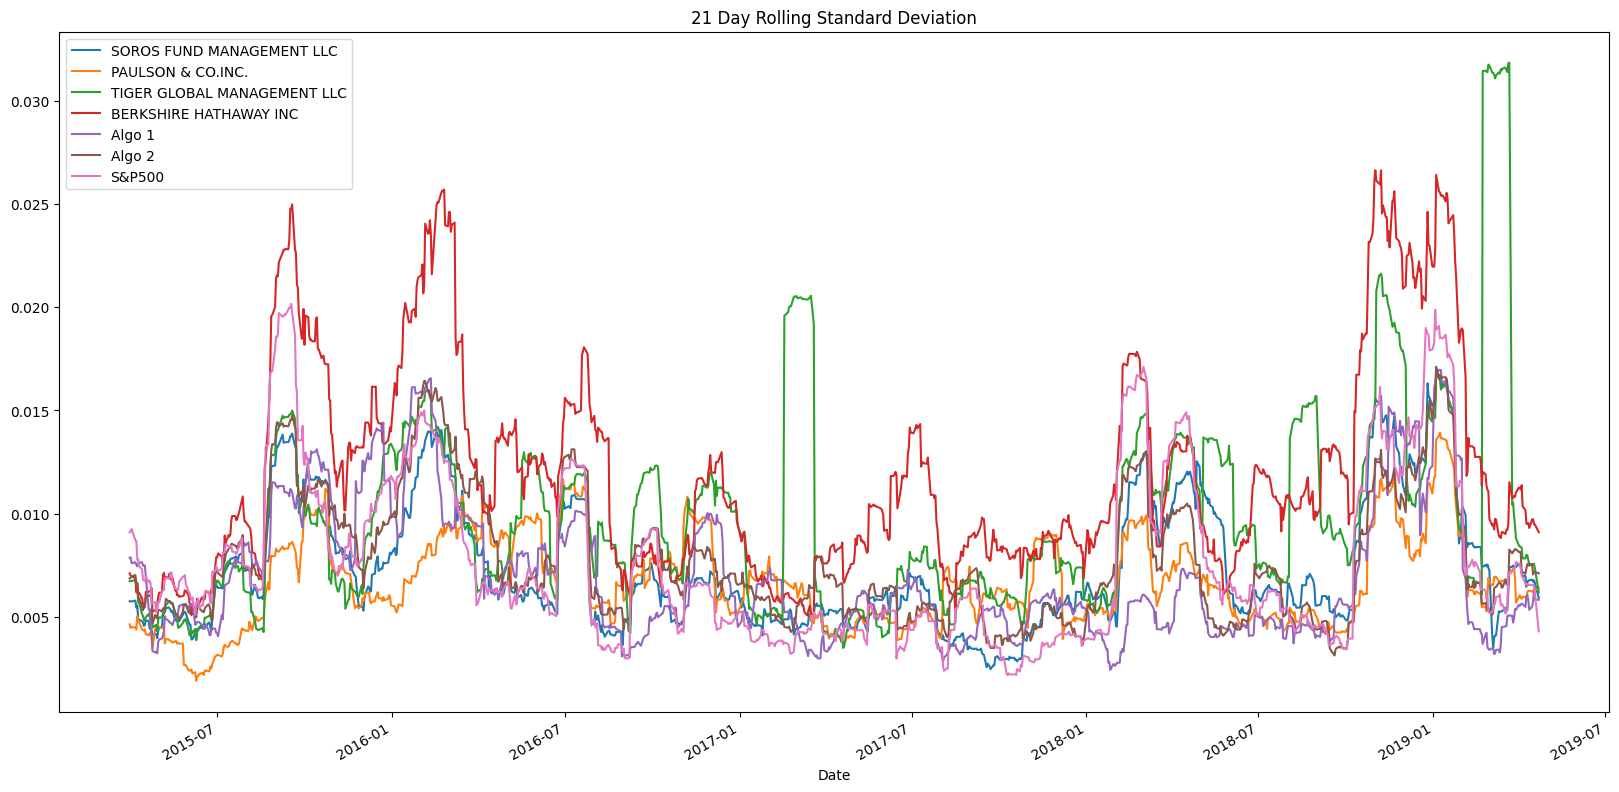

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
joined_portfolio_std21 = joined_portfolio.rolling(window=21).std()
# Plot the rolling standard deviation
joined_portfolio_std21.plot(title = "21 Day Rolling Standard Deviation", figsize = (20, 10))

### Calculate and plot the correlation

In [24]:
# Calculate the correlation
correlation = joined_portfolio.corr()
# Display the correlation matrix
display(correlation)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


<Axes: >

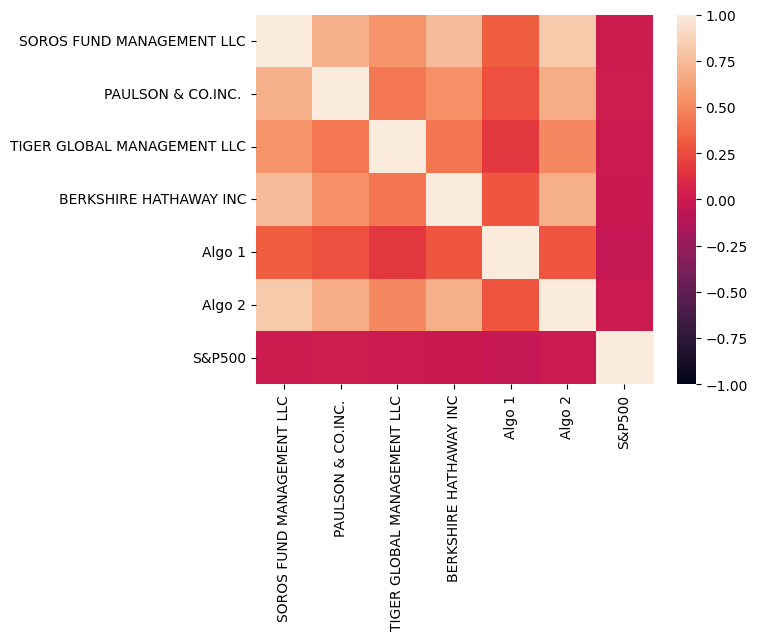

In [25]:
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: title={'center': 'Algo 1 Beta'}, xlabel='Date'>

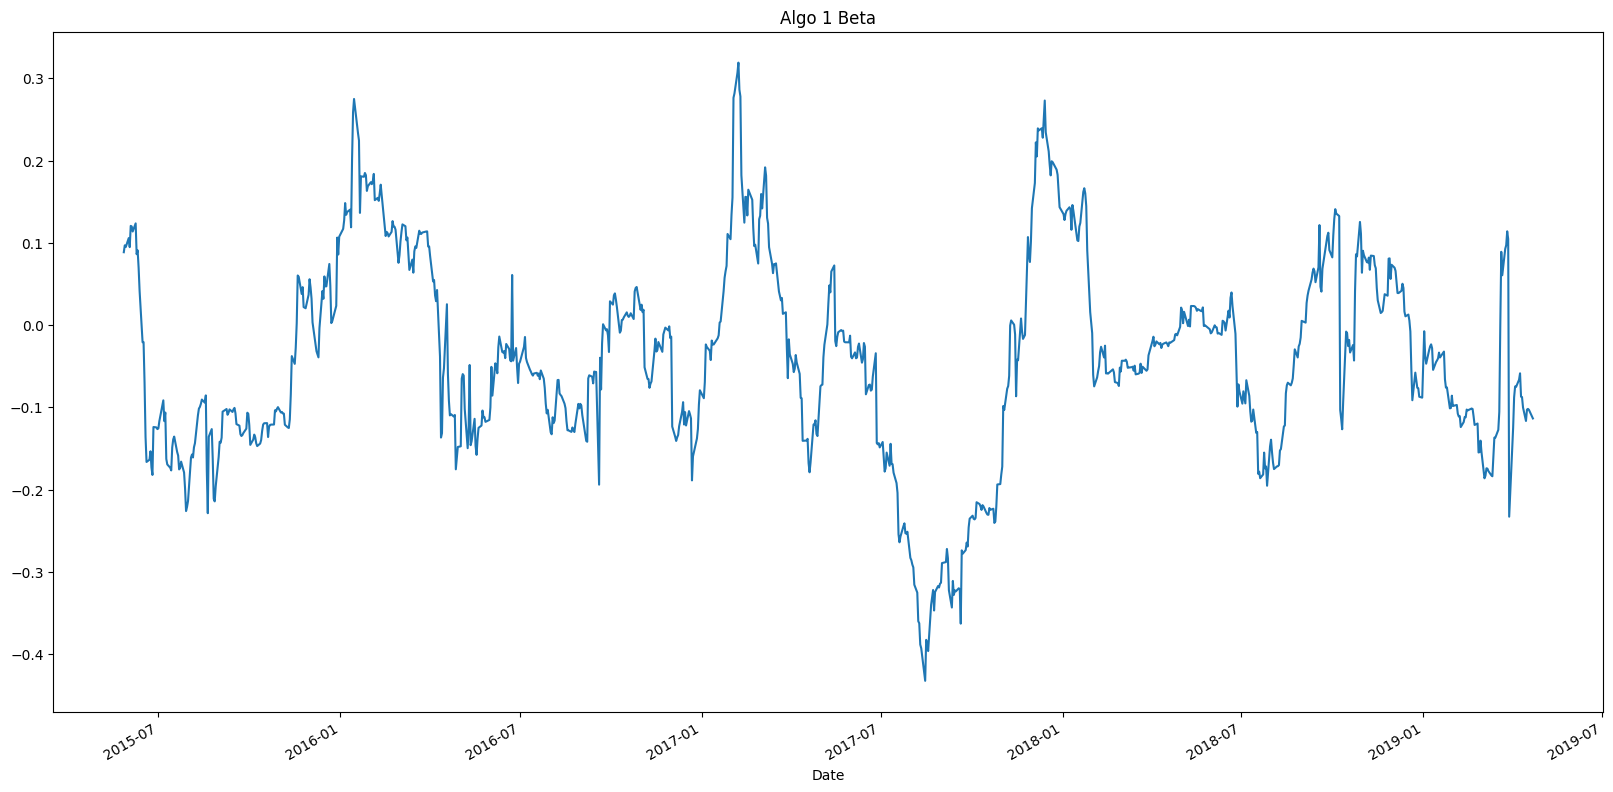

In [26]:
# Calculate covariance of a single portfolio
algo_1_covariance = joined_portfolio["Algo 1"].rolling(window=60).cov(joined_portfolio["S&P500"])
algo_1_covariance

# Calculate variance of S&P 500
sp500_variance = joined_portfolio["S&P500"].rolling(window=60).var()
sp500_variance

# Computing beta
algo_1_beta = algo_1_covariance / sp500_variance

# Plot beta trend
algo_1_beta.plot(title = "Algo 1 Beta", figsize = (20, 10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: title={'center': '21 Day Exponentially Weighted Average'}, xlabel='Date'>

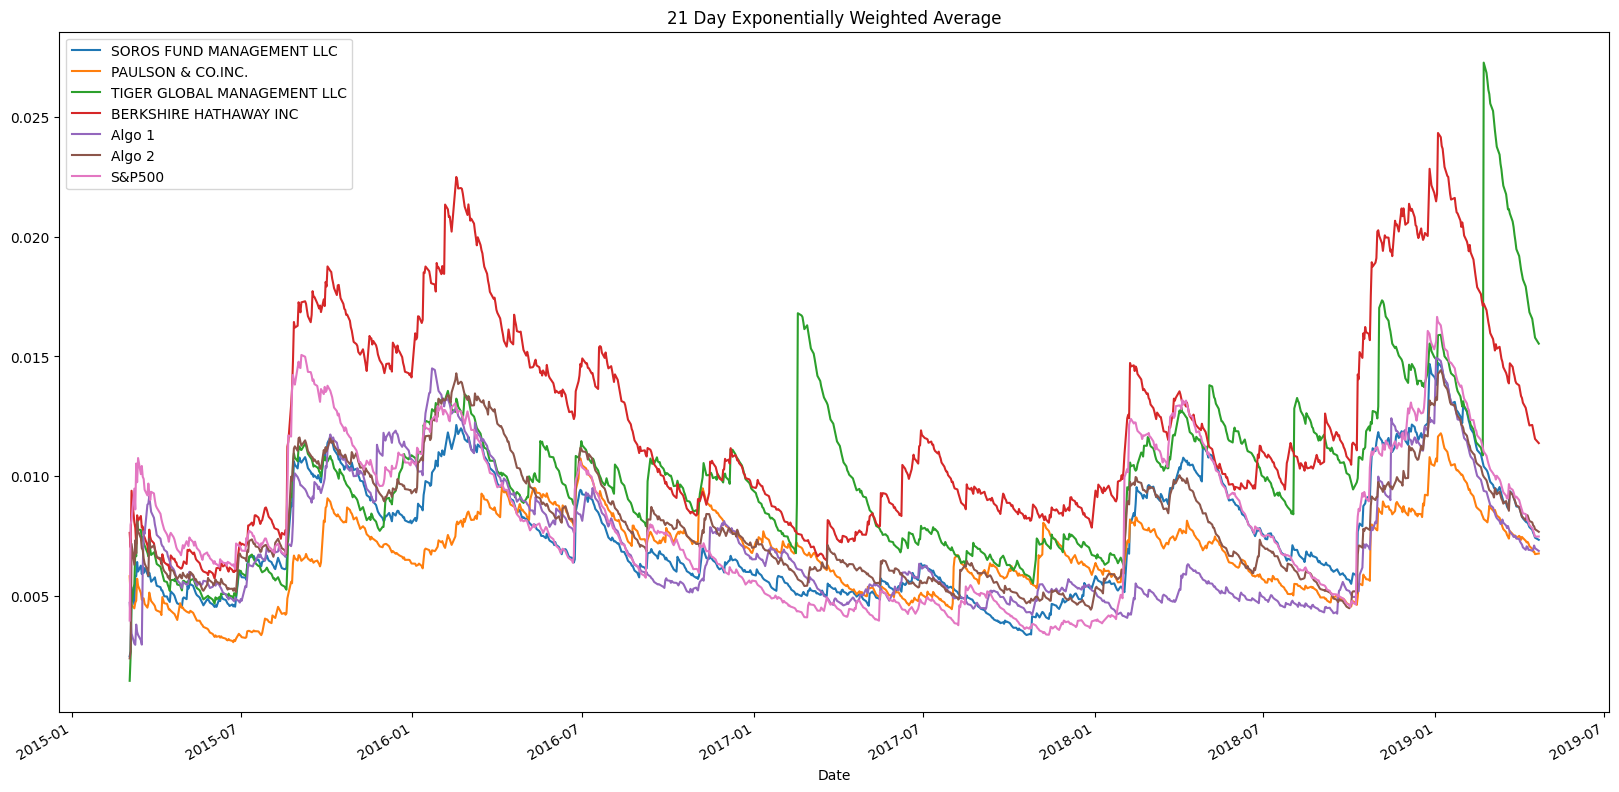

In [27]:
# Use `ewm` to calculate the rolling window
ewm = joined_portfolio.ewm(halflife = 21).std()
ewm.plot(title = "21 Day Exponentially Weighted Average", figsize = (20, 10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [28]:
# Annualized Sharpe Ratios
sharpe_ratio = (joined_portfolio.mean() * 252) / (joined_portfolio.std() * np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P500                        -0.518582
dtype: float64

<Axes: title={'center': 'Sharpe Ratio'}>

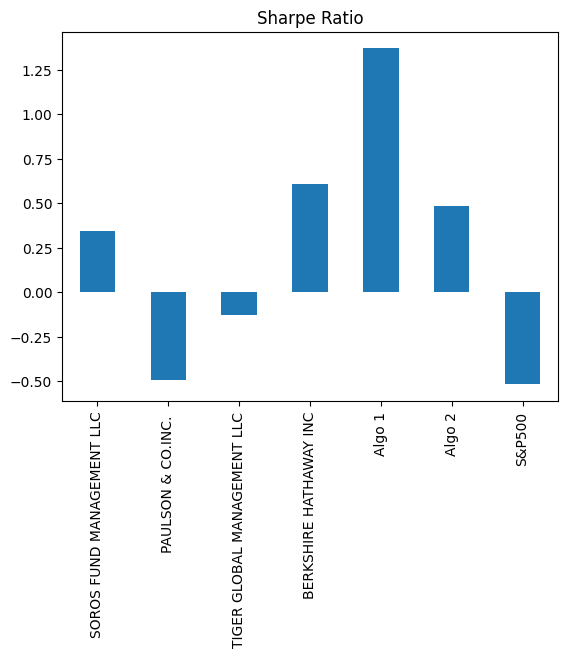

In [29]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind = "bar", title = "Sharpe Ratio")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

As shown in the Sharpe Ratio plot, Algorithm 1 has the highest ratio which indicates a better risk-adjusted performance compared to the rest.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [30]:
# Reading data from 1st stock
aapl_history_csv = Path("Resources/aapl_historical.csv")
aapl_history_df = pd.read_csv(aapl_history_csv, index_col = "Trade DATE", parse_dates = True, infer_datetime_format = True)
aapl_history_df.head()

/var/folders/nc/k83ql1n54sq4ty03_j4sv8pm0000gp/T/ipykernel_4920/1442269208.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  aapl_history_df = pd.read_csv(aapl_history_csv, index_col = "Trade DATE", parse_dates = True, infer_datetime_format = True)


,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [31]:
# Reading data from 2nd stock
cost_history_csv = Path("Resources/cost_historical.csv")
cost_history_df = pd.read_csv(cost_history_csv, index_col = "Trade DATE", parse_dates = True, infer_datetime_format = True)
cost_history_df.head()

/var/folders/nc/k83ql1n54sq4ty03_j4sv8pm0000gp/T/ipykernel_4920/324220216.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  cost_history_df = pd.read_csv(cost_history_csv, index_col = "Trade DATE", parse_dates = True, infer_datetime_format = True)


,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [32]:
# Reading data from 3rd stock
goog_history_csv = Path("Resources/goog_historical.csv")
goog_history_df = pd.read_csv(goog_history_csv, index_col = "Trade DATE", parse_dates = True, infer_datetime_format = True)
goog_history_df.head()

/var/folders/nc/k83ql1n54sq4ty03_j4sv8pm0000gp/T/ipykernel_4920/1313507620.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  goog_history_df = pd.read_csv(goog_history_csv, index_col = "Trade DATE", parse_dates = True, infer_datetime_format = True)


,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [33]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([aapl_history_df, cost_history_df, goog_history_df], axis = 1)

combined_df.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-09,AAPL,200.72,COST,243.47,GOOG,1162.38
2019-05-08,AAPL,202.90,COST,241.34,GOOG,1166.27
2019-05-07,AAPL,202.86,COST,240.18,GOOG,1174.10
2019-05-06,AAPL,208.48,COST,244.23,GOOG,1189.39
2019-05-03,AAPL,211.75,COST,244.62,GOOG,1185.40


In [34]:
# Reset Date index
combined_df.reset_index(inplace = True)

In [35]:
# Reorganize portfolio data by having a column per symbol
# Renaming column
combined_df.columns = ["Trade DATE", "AAPL Symbol", "AAPL NOCP", "COST Symbol", "COST NOCP", "GOOG Symbol", "GOOG NOCP"]
# removing all but Trade DATE and NOCP columns
combined_df = combined_df [["Trade DATE", "AAPL NOCP", "COST NOCP", "GOOG NOCP"]]
combined_df = combined_df.set_index("Trade DATE")
combined_df.columns = ["AAPL", "COST", "GOOG"]

combined_df.head()

,AAPL,COST,GOOG
Trade DATE,,,
2019-05-09,200.72,243.47,1162.38
2019-05-08,202.90,241.34,1166.27
2019-05-07,202.86,240.18,1174.10
2019-05-06,208.48,244.23,1189.39
2019-05-03,211.75,244.62,1185.40


In [36]:
# Calculate daily returns
custom_combined_returns = combined_df.pct_change()

# Drop NAs
custom_combined_returns.dropna(inplace = True)

# Display sample data
custom_combined_returns.head()

,AAPL,COST,GOOG
Trade DATE,,,
2019-05-08,0.010861,-0.008749,0.003347
2019-05-07,-0.000197,-0.004806,0.006714
2019-05-06,0.027704,0.016862,0.013023
2019-05-03,0.015685,0.001597,-0.003355
2019-05-02,-0.012279,-0.007890,-0.019226


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [59]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
custom_weighted_return = custom_combined_returns.dot(weights)

# Display sample data
custom_weighted_return.head()


Trade DATE
2019-05-08    0.001820
2019-05-07    0.000570
2019-05-06    0.019196
2019-05-03    0.004642
2019-05-02   -0.013131
dtype: float64

In [54]:
print(type(custom_weighted_return))


<class 'pandas.core.series.Series'>


In [55]:
number_of_elements = len(custom_weighted_return)
print(number_of_elements)


249


In [57]:
custom_weighted_return = pd.DataFrame()


In [58]:
numberof_columns = custom_weighted_return.shape[1]
print(numberof_columns)

0


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [103]:
combined_pf = pd.concat([custom_weighted_return, joined_portfolio], axis = "columns", join = "inner")
combined_pf.head()

,0,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
2019-04-22,-0.011812,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764
2019-04-18,-0.001148,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011
2019-04-17,-0.001541,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-16,-0.009149,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-15,-0.000326,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509


In [104]:
combined_pf = combined_pf.rename(columns={0: "Custom"})


In [105]:
combined_pf.head()

,Custom,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
2019-04-22,-0.011812,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764
2019-04-18,-0.001148,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011
2019-04-17,-0.001541,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-16,-0.009149,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-15,-0.000326,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509


In [96]:
# combined_pf = custom_weighted_return.copy()

In [97]:
# combined_pf = pd.DataFrame()


In [98]:
# Join your returns DataFrame to the original returns DataFrame
# combined_pf["Custom"] = custom_weighted_return


In [109]:
print("Custom" in combined_pf.columns)


True


In [110]:
combined_pf.head()

,Custom,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
2019-04-22,-0.011812,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764
2019-04-18,-0.001148,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011
2019-04-17,-0.001541,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-16,-0.009149,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-15,-0.000326,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509


In [111]:
num_columns = combined_pf.shape[1]
print(num_columns)

8


In [129]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_pf.dropna()


,Custom,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
2019-04-22,-0.011812,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764
2019-04-18,-0.001148,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011
2019-04-17,-0.001541,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-16,-0.009149,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-15,-0.000326,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
...,...,...,...,...,...,...,...,...
2018-05-17,0.006112,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639
2018-05-16,0.001618,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857
2018-05-15,-0.009283,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044
2018-05-14,0.010216,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889


## Re-run the risk analysis with your portfolio to see how it compares to the others

<Axes: title={'center': 'Combined Portfolio Risk'}>

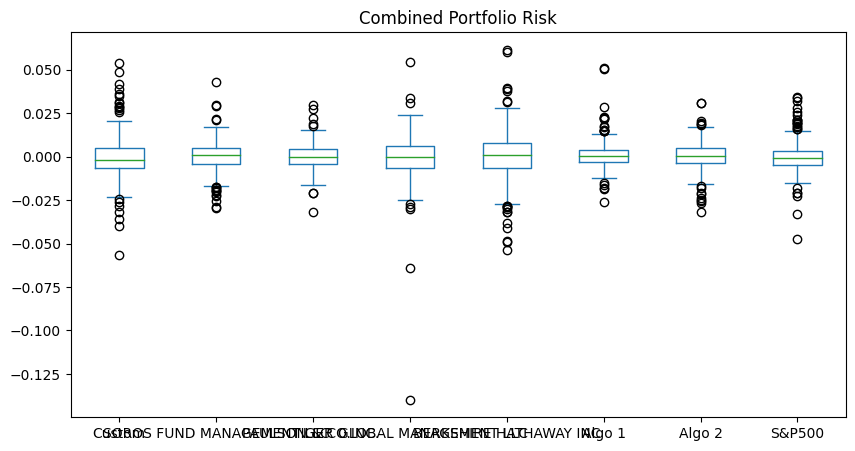

In [131]:
# Creating a box plot ot show the Combined_pf DataFrame Risk
combined_pf.plot.box(title = "Combined Portfolio Risk", figsize = (10, 5))


### Calculate the Annualized Standard Deviation

In [114]:
# Calculate the annualized `std`
annualized_std_pf_custom = combined_pf["Custom"].std() * np.sqrt(252)


### Calculate and plot rolling `std` with 21-day window

<Axes: >

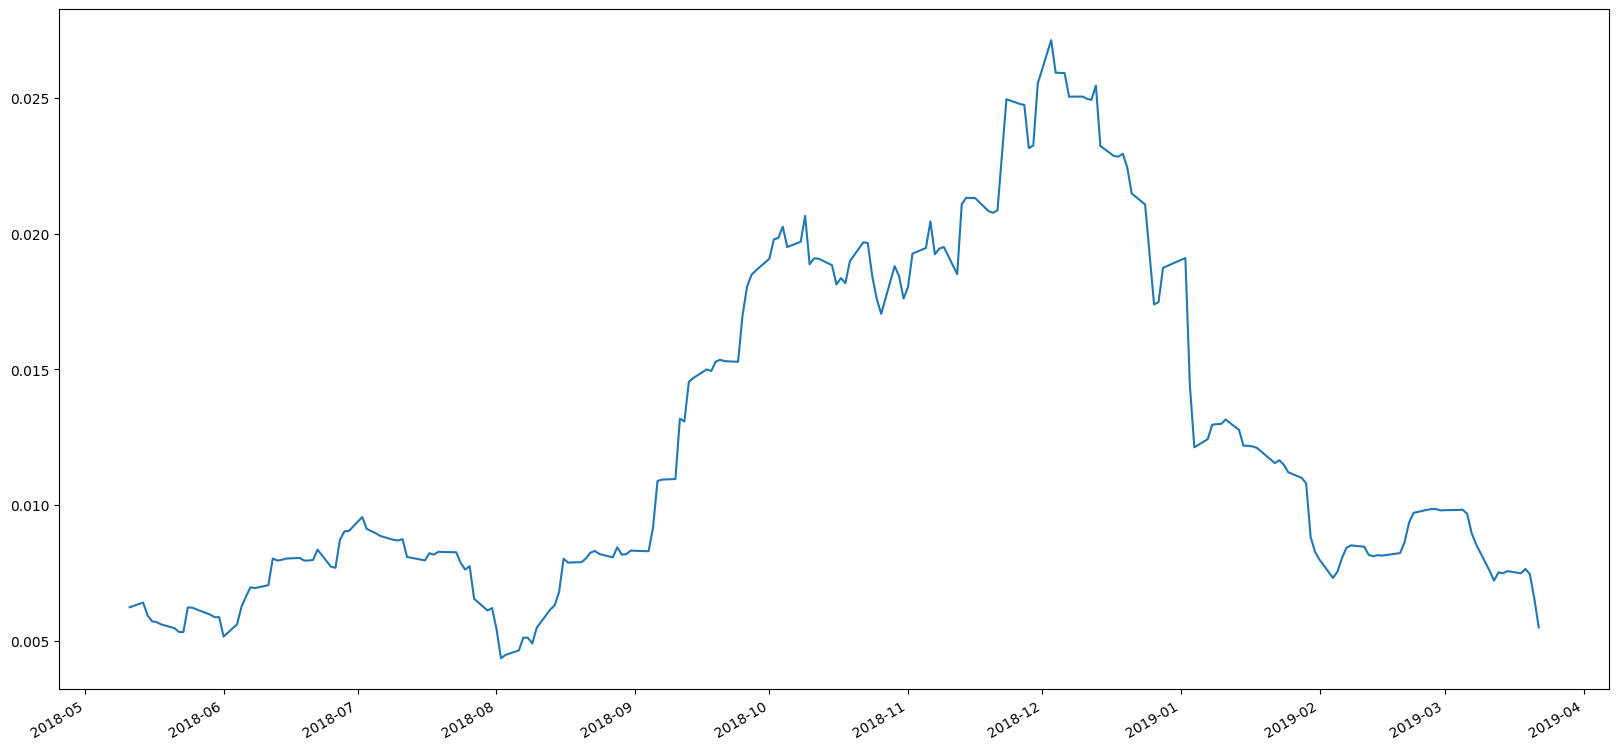

In [115]:
# Calculate rolling standard deviation
rolling_std_dev_custom = combined_pf["Custom"].rolling(window=21).std()

# Plot rolling standard deviation
rolling_std_dev_custom.plot(figsize=(20,10))


### Calculate and plot the correlation

In [116]:
# Calculate and plot the correlation
correlation_custom = combined_pf.corr()



### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [117]:
print("S&P500" in combined_pf.columns)


True


In [118]:
print(combined_pf.columns)


Index(['Custom', 'SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'S&P500'],
      dtype='object')


<Axes: >

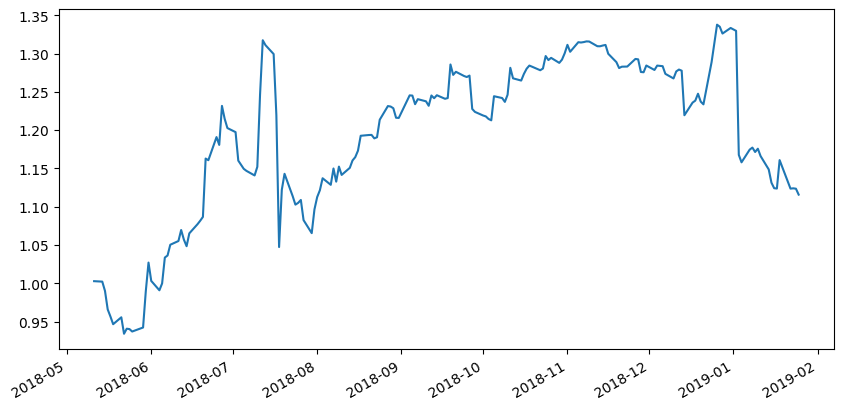

In [121]:
# Calculate and plot Beta
covariance_custom = combined_pf["Custom"].rolling(window=60).cov(combined_pf["S&P500"])
variance = combined_pf["S&P500"].rolling(window=60).var()
beta_custom = covariance_custom / variance
beta_custom.plot(figsize=(10,5))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [122]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios_custom = (combined_pf.mean() * 252) / (combined_pf.std() * np.sqrt(252))


In [123]:
sharpe_ratios_custom

Custom                        -0.613547
SOROS FUND MANAGEMENT LLC      0.344766
PAULSON & CO.INC.              0.236041
TIGER GLOBAL MANAGEMENT LLC   -1.052249
BERKSHIRE HATHAWAY INC         0.085005
Algo 1                         1.999866
Algo 2                         0.009467
S&P500                        -0.432942
dtype: float64

In [124]:
# List the column names
column_names = combined_pf.columns
print(column_names)


Index(['Custom', 'SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'S&P500'],
      dtype='object')


<Axes: title={'center': "Custom Portfolio' Sharpe Ratio Plot"}>

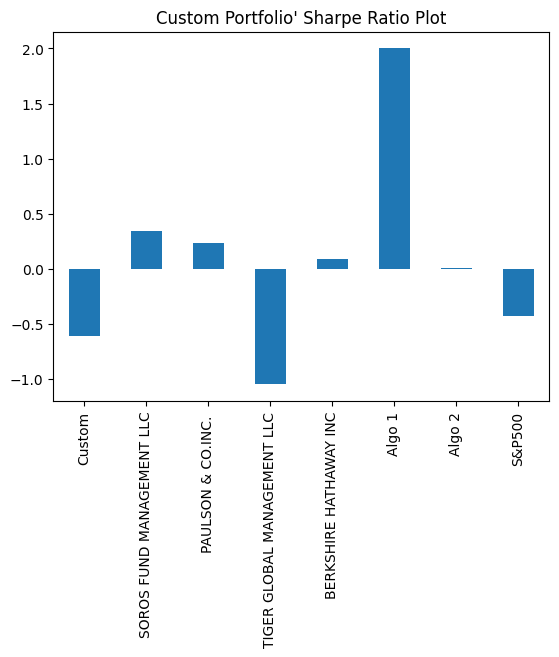

In [125]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_custom.plot(kind="bar", title="Custom Portfolio' Sharpe Ratio Plot")


### How does your portfolio do?

Write your answer here!

Unfortunately the "Custom" portfolio didn't meet expectations. It not only lagged behind the S&P500 combined portfolio but essentially ended up being the second worse portfolio in the above shown list. 